<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week8/Clustering_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:

genes = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week7/genes.csv")
genes_ML = preprocessing.scale(genes, axis=0)

In [3]:
iris_df = sns.load_dataset('iris')
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_ML = iris_df[numeric_cols]


In [27]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')
food_ML = food.drop(columns = ['Category', 'Description', 'Nutrient Data Bank Number'])
mcg = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Selenium',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K']



mg = ['Data.Cholesterol',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Major Minerals.Calcium',
'Data.Major Minerals.Copper',
'Data.Major Minerals.Iron',
'Data.Major Minerals.Magnesium',
'Data.Major Minerals.Phosphorus',
'Data.Major Minerals.Potassium',
'Data.Major Minerals.Sodium',
'Data.Major Minerals.Zinc',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

for m in mg:
  food_ML.loc[:, m] = food_ML.loc[:, m] / 1000

for m in mcg:  
  print(m)
  food_ML.loc[:, m] = food_ML.loc[:, m] / 1000000

#food_ML = food_ML.drop(columns = ['Category', 'Description'])


Data.Alpha Carotene
Data.Beta Carotene
Data.Beta Cryptoxanthin
Data.Lutein and Zeaxanthin
Data.Lycopene
Data.Retinol
Data.Selenium
Data.Vitamins.Vitamin A - RAE
Data.Vitamins.Vitamin B12
Data.Vitamins.Vitamin K


In [28]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,1.03,0.000060,0.000036,1.800000e-06,6.89,0.000014,87.50,1.658,0.497,2.009,4.38,0.032,0.000052,0.00003,0.003,0.014,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,3.34,0.000058,0.000137,1.900000e-06,4.89,0.000057,89.04,0.426,0.065,1.164,1.99,0.126,0.000001,0.00000,0.012,0.103,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,3.28,0.000031,0.000138,1.900000e-06,4.81,0.000056,88.10,0.688,0.108,1.860,3.20,0.123,0.000001,0.00000,0.012,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
3,0.000000,0.000007,0.000000,4.46,0.014,0.0160,0.0,0.000000,0.000000,0.000043,3.10,0.000028,0.000105,2.000000e-06,4.46,0.000020,88.20,0.999,0.128,2.154,3.46,0.101,0.000010,0.00005,0.005,0.086,0.253,0.003,0.00038,0.000029,3.600000e-07,0.000034,0.0009,0.00008,3.000000e-07
4,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,3.28,0.000031,0.000138,1.900000e-06,4.81,0.000056,88.10,0.688,0.108,1.860,3.20,0.123,0.000001,0.00000,0.012,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,0.000103,0.000464,0.000000,5.48,0.000,0.0074,1.6,0.000142,0.002597,0.000637,1.11,0.000000,0.000024,1.000000e-07,3.42,0.000045,92.57,0.035,0.094,0.038,0.23,0.014,0.000071,0.00033,0.013,0.030,0.278,0.006,0.00021,0.000043,0.000000e+00,0.000104,0.0182,0.00060,8.800000e-06
7079,0.000001,0.000011,0.000000,4.81,0.000,0.0194,1.4,0.000018,0.000000,0.003678,3.46,0.000000,0.000410,9.900000e-06,2.73,0.000085,90.37,0.002,0.175,0.061,0.38,0.006,0.000346,0.00057,0.011,0.096,0.364,0.006,0.00058,0.000001,4.000000e-08,0.000123,0.0063,0.00003,4.000000e-07
7080,0.000368,0.000994,0.000000,11.60,0.000,0.0146,2.2,0.000225,0.000458,0.000773,1.81,0.000000,0.000046,4.000000e-07,3.25,0.000066,85.59,0.017,0.064,0.051,0.19,0.022,0.000073,0.00060,0.018,0.046,0.312,0.019,0.00028,0.000098,0.000000e+00,0.000177,0.0162,0.00024,8.900000e-06
7081,0.000000,0.000194,0.000004,17.14,0.013,0.0200,0.6,0.000112,0.007237,0.000917,1.34,0.000004,0.000112,4.500000e-06,13.08,0.000028,55.97,5.321,13.522,3.544,22.85,0.018,0.000064,0.00043,0.013,0.033,0.190,0.845,0.00021,0.000021,4.000000e-08,0.000104,0.0025,0.00190,5.080000e-05


# DBSCAN
Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

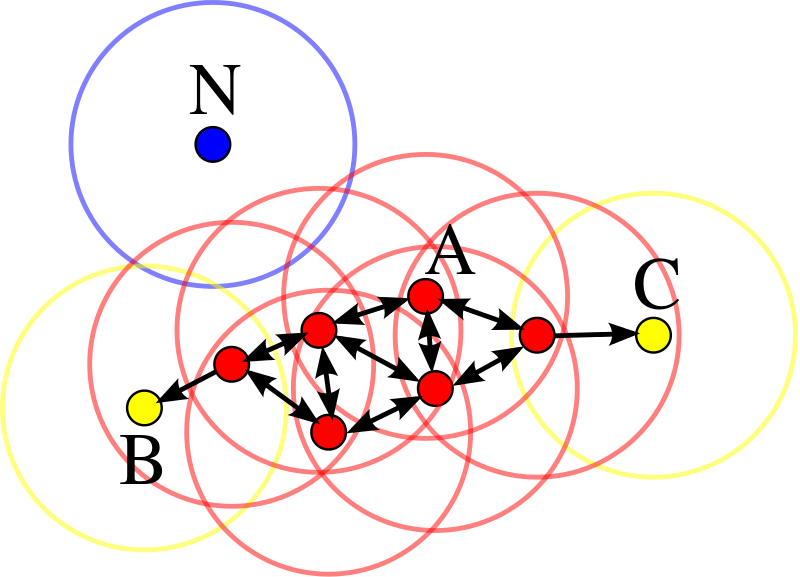

**Epsilon** is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

**min_samples** is the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

Noisy samples are given the label -1

In [5]:
from sklearn.cluster import DBSCAN



### Genes dataset

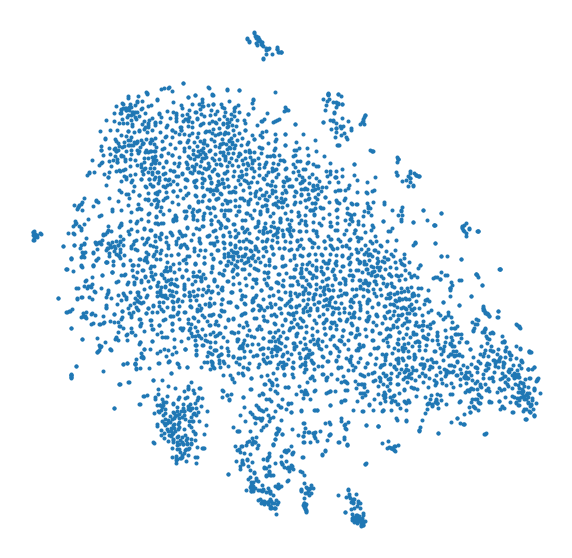

In [8]:
import sklearn
# 2d representation of all the features with t-SNE
twodproj = sklearn.manifold.TSNE(n_components=2).fit_transform(genes_ML)
plt.figure(figsize  = (10,10))
plt.plot(twodproj[:,0], twodproj[:,1], '.')
plt.axis('off');

In [9]:
# apply the model
model = DBSCAN(eps=5, min_samples=20)


model.fit(genes_ML)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [10]:
# check how many labels

np.unique(model.labels_)

array([-1,  0,  1,  2])

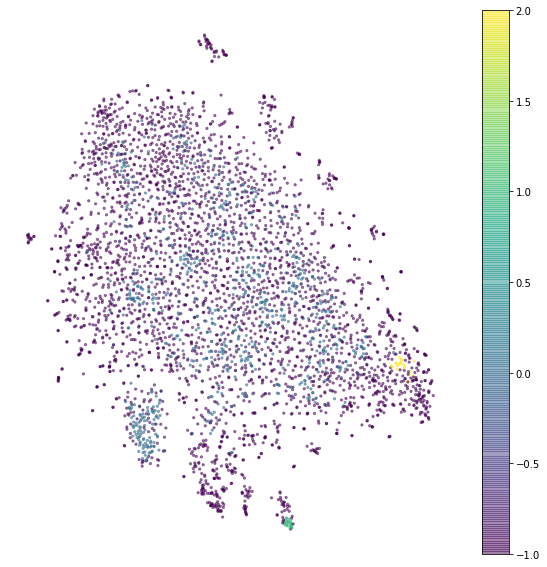

In [11]:
# visualize the labels in dataset

plt.figure(figsize  = (10,10))
plt.scatter(twodproj[:,0], twodproj[:,1], c=model.labels_, alpha=0.5,s=5)
plt.axis('off')
# plt.legend()
plt.colorbar();

### Food

In [29]:
food_ML

,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin,Data.Protein,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,0.000000,0.000007,0.000000,6.89,0.014,0.0160,0.0,0.000000,0.000000,0.000177,1.03,0.000060,0.000036,1.800000e-06,6.89,0.000014,87.50,1.658,0.497,2.009,4.38,0.032,0.000052,0.00003,0.003,0.014,0.051,0.017,0.00017,0.000061,5.000000e-08,0.000011,0.0050,0.00008,3.000000e-07
1,0.000000,0.000004,0.000000,4.87,0.008,0.0179,0.0,0.000000,0.000000,0.000110,3.34,0.000058,0.000137,1.900000e-06,4.89,0.000057,89.04,0.426,0.065,1.164,1.99,0.126,0.000001,0.00000,0.012,0.103,0.157,0.039,0.00042,0.000059,5.600000e-07,0.000060,0.0001,0.00003,2.000000e-07
2,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,3.28,0.000031,0.000138,1.900000e-06,4.81,0.000056,88.10,0.688,0.108,1.860,3.20,0.123,0.000001,0.00000,0.012,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
3,0.000000,0.000007,0.000000,4.46,0.014,0.0160,0.0,0.000000,0.000000,0.000043,3.10,0.000028,0.000105,2.000000e-06,4.46,0.000020,88.20,0.999,0.128,2.154,3.46,0.101,0.000010,0.00005,0.005,0.086,0.253,0.003,0.00038,0.000029,3.600000e-07,0.000034,0.0009,0.00008,3.000000e-07
4,0.000000,0.000007,0.000000,4.67,0.012,0.0178,0.0,0.000000,0.000000,0.000105,3.28,0.000031,0.000138,1.900000e-06,4.81,0.000056,88.10,0.688,0.108,1.860,3.20,0.123,0.000001,0.00000,0.012,0.101,0.150,0.038,0.00041,0.000032,5.400000e-07,0.000061,0.0000,0.00005,3.000000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,0.000103,0.000464,0.000000,5.48,0.000,0.0074,1.6,0.000142,0.002597,0.000637,1.11,0.000000,0.000024,1.000000e-07,3.42,0.000045,92.57,0.035,0.094,0.038,0.23,0.014,0.000071,0.00033,0.013,0.030,0.278,0.006,0.00021,0.000043,0.000000e+00,0.000104,0.0182,0.00060,8.800000e-06
7079,0.000001,0.000011,0.000000,4.81,0.000,0.0194,1.4,0.000018,0.000000,0.003678,3.46,0.000000,0.000410,9.900000e-06,2.73,0.000085,90.37,0.002,0.175,0.061,0.38,0.006,0.000346,0.00057,0.011,0.096,0.364,0.006,0.00058,0.000001,4.000000e-08,0.000123,0.0063,0.00003,4.000000e-07
7080,0.000368,0.000994,0.000000,11.60,0.000,0.0146,2.2,0.000225,0.000458,0.000773,1.81,0.000000,0.000046,4.000000e-07,3.25,0.000066,85.59,0.017,0.064,0.051,0.19,0.022,0.000073,0.00060,0.018,0.046,0.312,0.019,0.00028,0.000098,0.000000e+00,0.000177,0.0162,0.00024,8.900000e-06
7081,0.000000,0.000194,0.000004,17.14,0.013,0.0200,0.6,0.000112,0.007237,0.000917,1.34,0.000004,0.000112,4.500000e-06,13.08,0.000028,55.97,5.321,13.522,3.544,22.85,0.018,0.000064,0.00043,0.013,0.033,0.190,0.845,0.00021,0.000021,4.000000e-08,0.000104,0.0025,0.00190,5.080000e-05


In [12]:
model = DBSCAN(eps=500, min_samples=50)


model.fit(food_ML)

DBSCAN(algorithm='auto', eps=500, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [ ]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
food['labels'] = model.labels_
food['labels'].value_counts()

-1    6568
 0     120
 3      95
 5      73
 6      67
 4      60
 2      50
 1      50
Name: labels, dtype: int64

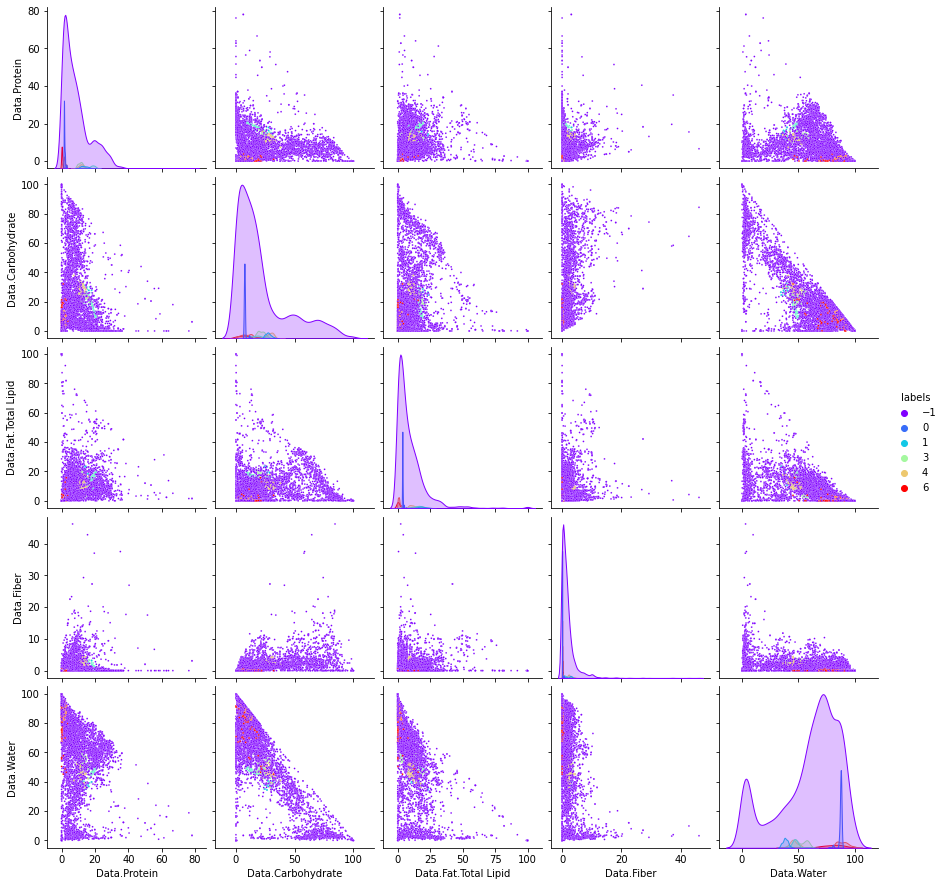

In [ ]:
# visualize the labels in dataset

data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

In [ ]:
# check which food belongs to each cluster

for f in food['labels'].unique():
  
  d = food[food['labels'] == f]
  print("label:", f, ", category:", d['Category'].value_counts())

label: -1 , category: Rice                           143
Bread                          119
Potato                         105
Cookie                         100
Egg omelet or scrambled egg     82
                              ... 
Butterscotch morsels             1
Espresso coffee beans            1
Lobster with bread stuffing      1
Egg casserole with bread         1
Jai                              1
Name: Category, Length: 2342, dtype: int64
label: 0 , category: Infant formula    120
Name: Category, dtype: int64
label: 1 , category: Cheese sandwich            37
Grilled cheese sandwich    13
Name: Category, dtype: int64
label: 2 , category: Cheeseburger                                    11
Hamburger                                       11
Double cheeseburger                              9
Double hamburger                                 9
Cheeseburger slider                              2
Hamburger slider                                 2
Big Mac (McDonalds)                      

### Iris

In [ ]:
model = DBSCAN(eps=1, min_samples=5)


model.fit(iris_ML)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
np.unique(model.labels_)

array([-1,  0,  1,  2])

In [ ]:
iris_ML['labels'] = model.labels_
iris_ML['labels'].value_counts()

 1    84
 0    49
-1    10
 2     7
Name: labels, dtype: int64

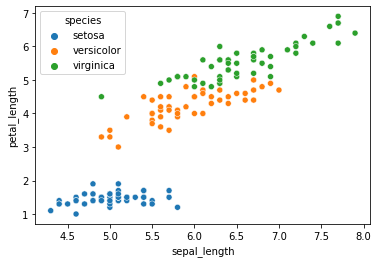

In [ ]:
# official classification
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

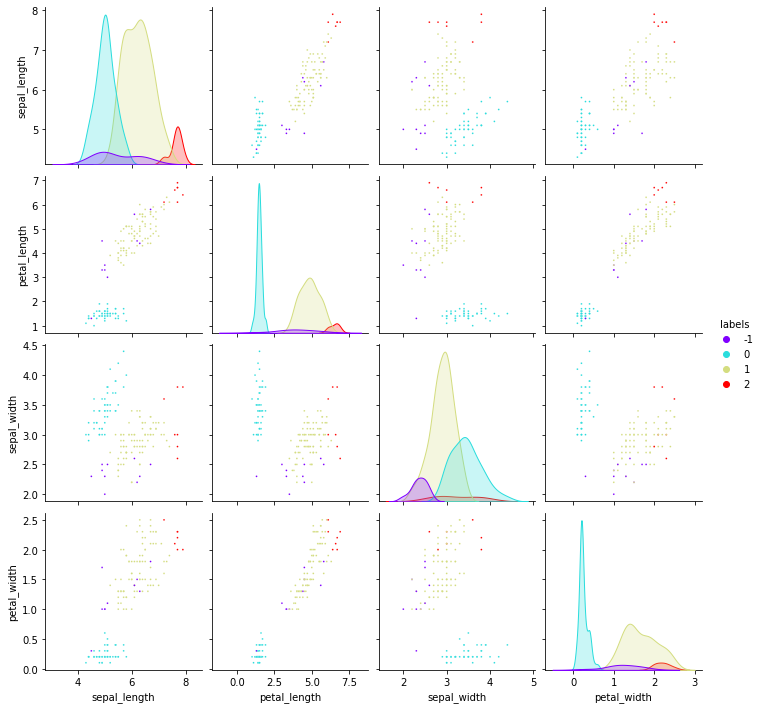

In [ ]:
# visualize the DBSCAN clusters in dataset

data = iris_ML[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

### Exercise
Modify the epsilon and min_samples in the different dasets to find different clusters

# Hierarchical Clustering


The most common approach (agglomerative clustering) works as follows:

* Mark each point in the dataset as a cluster.
* Pick the two closest cluster centers without a parent and combine them into a new cluster.
* The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
* Repeat steps 2 and 3 till there's just one cluster left.




In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

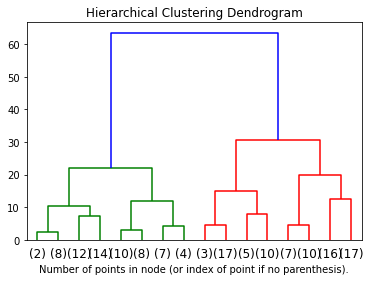

In [ ]:
model = AgglomerativeClustering(distance_threshold=30, n_clusters=None)

model = model.fit(iris_ML)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
np.unique(model.labels_)

array([0, 1, 2])

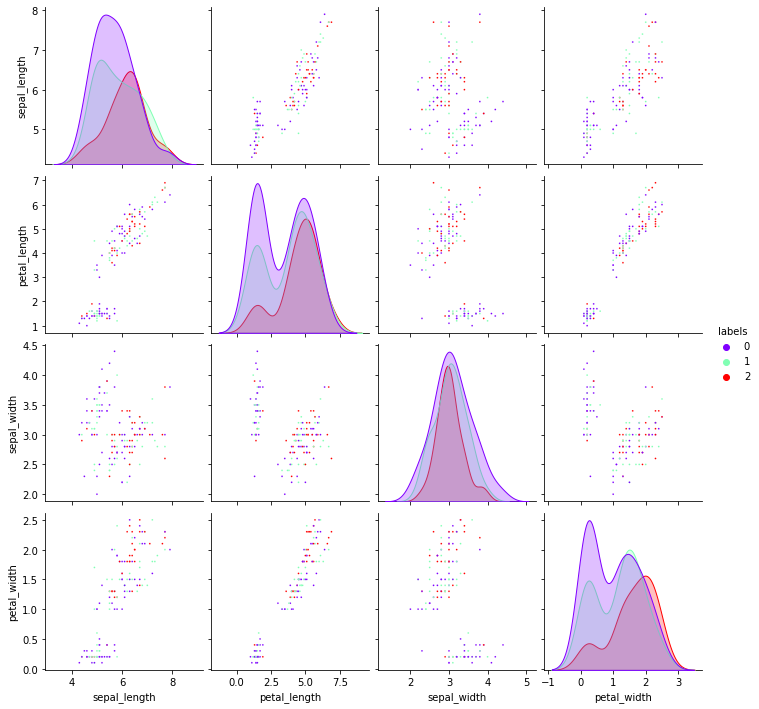

In [ ]:
# visualize the hirarchical clusters in dataset

iris_ML['labels'] = model.labels_
iris_ML['labels'].value_counts()

data = iris_ML[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})
#

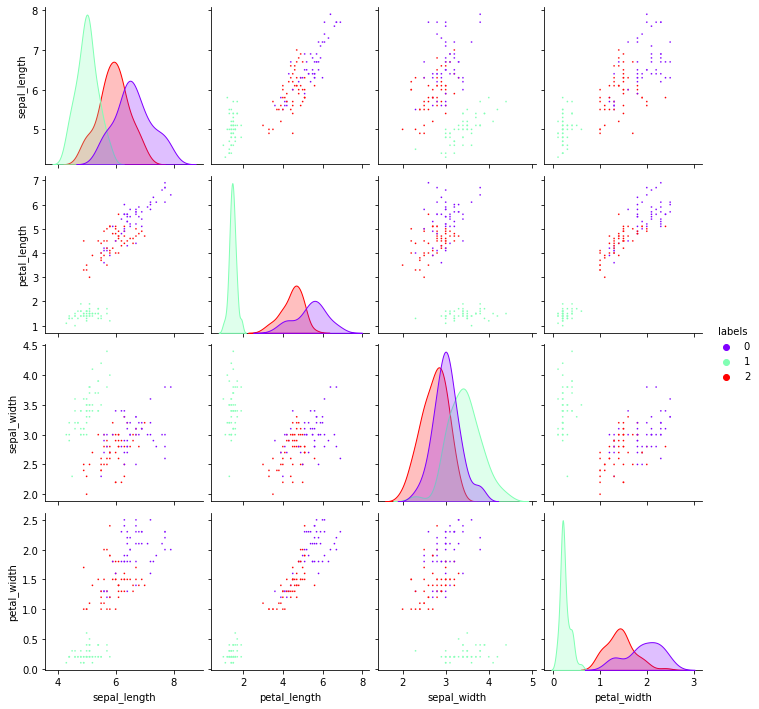

In [ ]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=3)

model = model.fit(iris_ML)

iris_ML['labels'] = model.labels_
iris_ML['labels'].value_counts()

data = iris_ML[['sepal_length', 'petal_length', 'sepal_width', 'petal_width','labels']]
sns.pairplot(data, hue='labels', palette="rainbow", plot_kws={"s": 3})

### Exercise

Do hierarchical clustering on the food and gene dataset, modifying appropriately the distance threshold and n_clusters parameters

# Dimensionality reduction and manifold learning


In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number.

Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

## Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. 

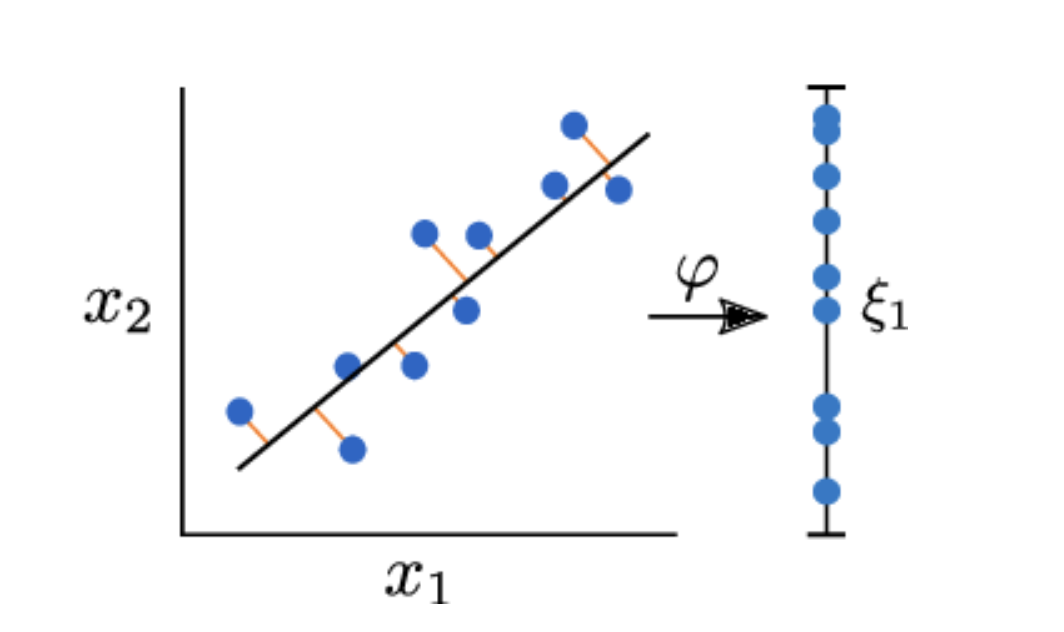

In scikit-learn, PCA is implemented as a transformer object that learns  components in its fit method, and can be used on new data to project it on these components.

In [ ]:
from sklearn.decomposition import PCA

### Iris

In [ ]:
pca = PCA(n_components=2)
pca.fit(iris_ML)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformed = pca.transform(iris_ML)


Text(0, 0.5, 'PC2')

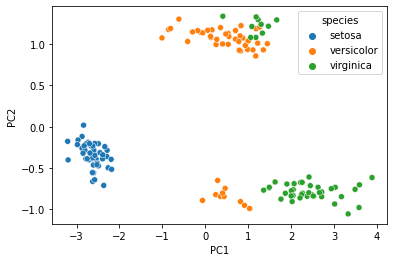

In [ ]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);
plt.xlabel('PC1')
plt.ylabel('PC2')

### Food

In [ ]:
pca = PCA(n_components=5)
pca.fit(food_ML)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformed = pca.transform(food_ML)

In [ ]:
transf = pd.DataFrame(transformed, columns = ["PC"+ str(i) for i in range(5)])

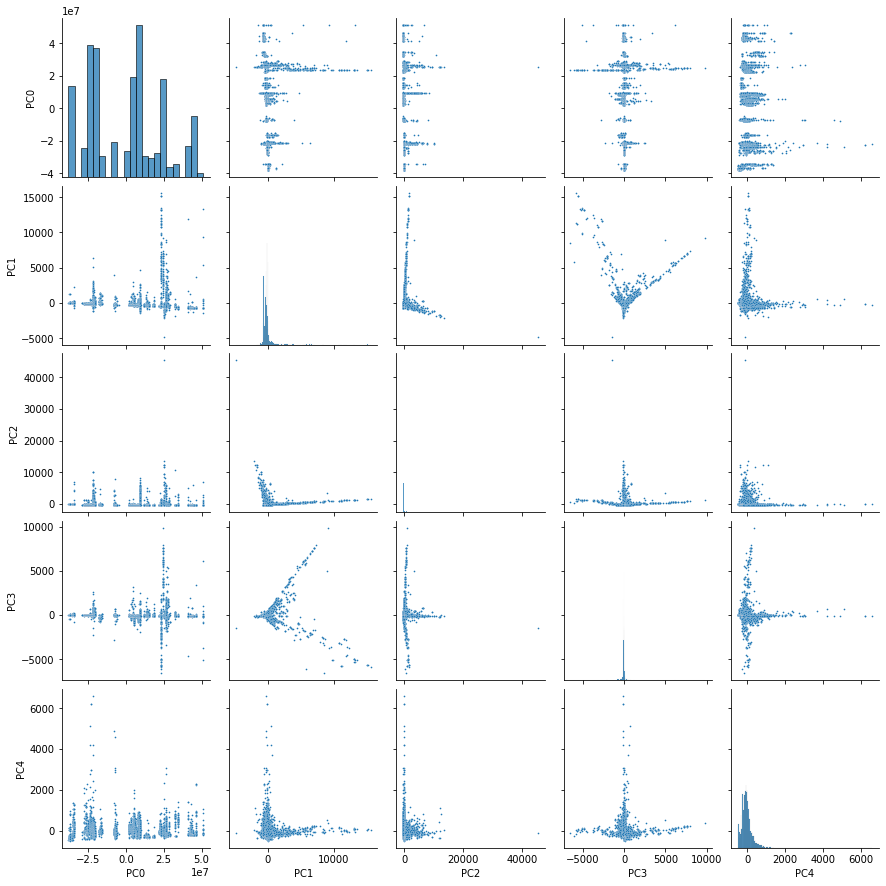

In [ ]:
# draw all the principal components

sns.pairplot(transf, palette="rainbow", plot_kws={"s": 3})


### Exercise

Try PCD with genes (change different n_components)

## Manifold learning

Principal Component Analysis (PCA) chooses an “interesting” linear projection of the data, but often miss important non-linear structure in the data.

Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. Though supervised variants exist, the typical manifold learning problem is unsupervised: it learns the high-dimensional structure of the data from the data itself, without the use of predetermined classifications.

### t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE (TSNE) converts affinities of data points to probabilities. t-SNE is particularly sensitive to local structure and has a few other advantages over existing techniques:

* Revealing the structure at many scales on a single map

* Revealing data that lie in multiple, different, manifolds or clusters

* Reducing the tendency to crowd points together at the center

t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples

A feature of t-SNE is a tuneable parameter, **“perplexity”**, which says (loosely) how to balance attention between local and global aspects of the data. Larger perplexities lead to more nearest neighbors and less sensitive to small structure. 

The t-SNE algorithm doesn’t always produce similar output on successive runs, for example, and there are additional hyperparameters related to the optimization process.

Axes do not have any unit of measure and do not really mean anything!





[How to use t-SNE effectively](https://distill.pub/2016/misread-tsne/)

### Iris dataset

In [ ]:
# >>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# >>> X_embedded = TSNE(n_components=2, learning_rate='auto',
# ...                   init='random').fit_transform(X)
# >>> X_embedded.shape


twodproj = skl.manifold.TSNE(n_components=2).fit_transform(iris_ML)


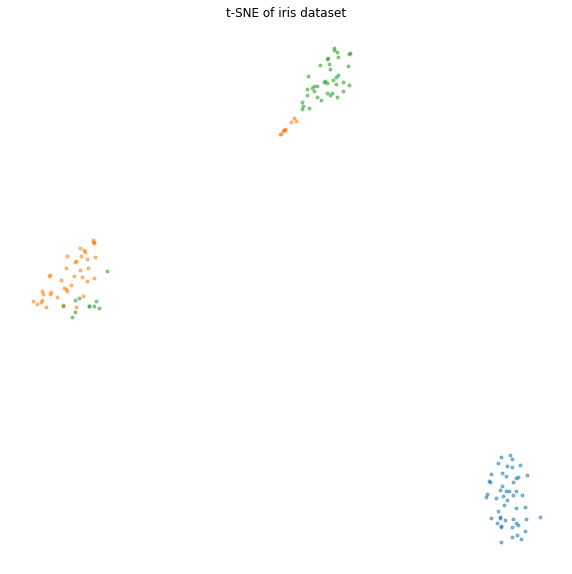

In [ ]:
twodproj = pd.DataFrame(twodproj)
twodproj['label'] = iris_df['species']
plt.figure(figsize  = (10,10))
for i in twodproj['label'].unique():
  data = twodproj[twodproj['label'] == i]
  plt.plot(data[0], data[1], '.', label = i, alpha=0.5)
plt.title('t-SNE of iris dataset')
plt.axis('off');

### Exercise

Play around with perplexity in the food dataset